In [2]:
## Long Short Term Memory (LSTM) Recurrent Neural Network (RNN)
## This video was guided by the following tutorial: https://www.youtube.com/watch?v=QIUxPv5PJOY

## This program considers the past 60 day stock price for predictoions.

In [3]:
!pip install --upgrade pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 9.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.1 MB/s 
     |████████████████████████████████| 112 kB 18.7 MB/s 
     |████████████████████████████████| 110 kB 34.2 MB/s 
     |████████████████████████████████| 4.1 MB 18.0 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 128 kB 70.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found

In [4]:
# Importing relevant libraries

import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# Retrieve stock quotes

import yfinance as yf
yf.pdr_override() 

df = web.get_data_yahoo('AAPL', start='2012-01-01', end='2019-12-17')

# Display data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519277,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586561,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726294,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859334,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838937,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.755966,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.316826,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.485817,137310400


In [6]:
# Retrieve matrix dimensions

df.shape

(2002, 6)

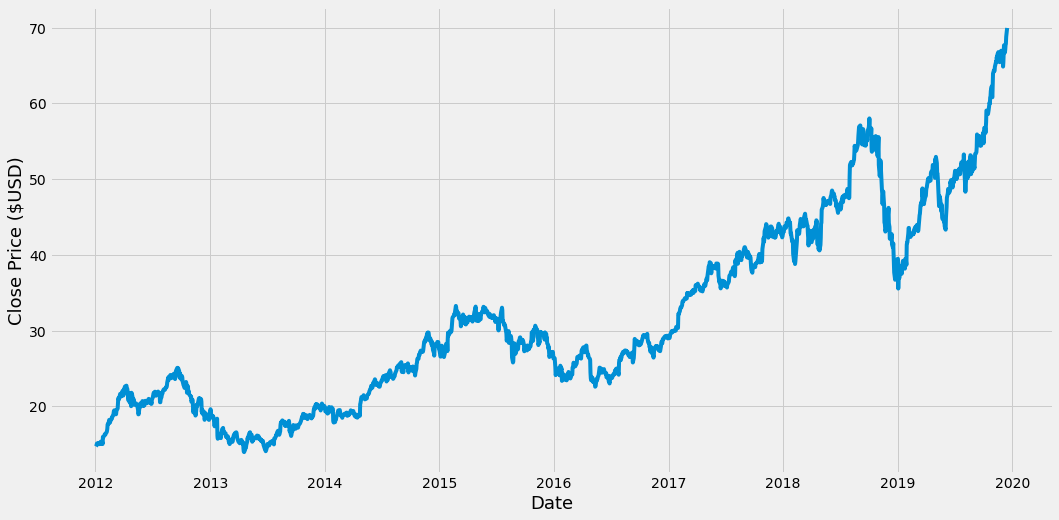

In [7]:
# Visualize the closing price

plt.figure(figsize=(16,8))
plt.title='Close Price History'
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($USD)', fontsize=18)

plt.show()

In [8]:
# Create a new dataframe with only closing prices

data = df.filter(['Close'])

# Convert dataframe to a numpy array
dataset = data.values

# Compute row count to train the model on => 80% of data for training
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

1602


In [9]:
# Scale the data for preprocessing

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)   # Computes min and max values for scaling, then transforms. Standardizes data from 0 to 1 inclusive

scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [10]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])   # Positions 0 to 59
  y_train.append(train_data[i, 0])        # Position 60
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.0189

In [11]:
# Convert x_train and y_train to numpy arrays 

x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshape the x_train data set => Add third column

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [13]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [14]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')


In [15]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 43s 26ms/step - loss: 7.1113e-04


In [16]:
# Create the testing data set

# Array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [17]:
# Convert the data to a numpy array

x_test = np.array(x_test)


In [18]:
# Reshape the data 

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Num of rows, num of columns, num of features (just the close price)


In [19]:
# Retrieve model's predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)   # Unscale predictions to compare to original closing prices (y_test)



13/13 [==============================] - 1s 13ms/step


In [20]:
# Evaluate root mean square error (RMSE) => Standard deviation of the residuals

rmse = np.sqrt( np.mean( predictions - y_test )**2 )
print(rmse)

1.2945638275146485


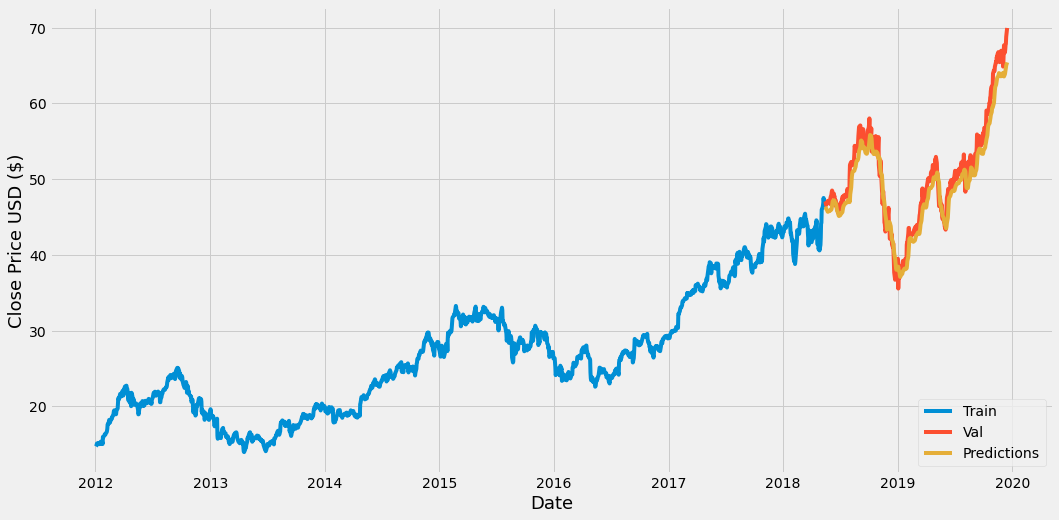

In [21]:
# Plot the data

train = data[:training_data_len].copy()  
valid = data[training_data_len:].copy()  

valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title='Model'
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
# Display valid and predicted prices

valid

,Close,Predictions
Date,,
2018-05-16,47.044998,46.345623
2018-05-17,46.747501,46.259041
2018-05-18,46.577499,46.106514
2018-05-21,46.907501,45.914494
2018-05-22,46.790001,45.786514
...,...,...
2019-12-10,67.120003,64.119225
2019-12-11,67.692497,64.378128
2019-12-12,67.864998,64.691544


In [25]:
# Predict closing price for AAPL stock on december 18, 2019

#.Retrieve actual quote
apple_quote=web.get_data_yahoo('AAPL', start='2012-01-01', end='2019-12-17')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Retrieve only last 60 days of data and convert to array
last_sixty_days = new_df[-60:].values

# Scale the data to [0:1]
last_sixty_days_scaled = scaler.transform(last_sixty_days)

# Initialize list
new_x_test = []
new_x_test.append(last_sixty_days_scaled)

# Convert to numpy array
new_x_test = np.array(new_x_test)

# Reshape
new_x_test = np.reshape(new_x_test, (new_x_test.shape[0], new_x_test.shape[1], 1))

# Calculate predictions
pred_price = model.predict(new_x_test)

# Rescale predictions 
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 19ms/step
[[66.00622]]


In [31]:
# Evaluate efficacy of model

# Retrieve actual future quote data
actual_apple_quote=web.get_data_yahoo('AAPL', start='2019-12-18', end='2019-12-19')
print(actual_apple_quote['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-18    69.934998
Name: Close, dtype: float64
